In [19]:
import sys, os
sys.path.append(os.path.abspath(".."))

from src import config
from sqlalchemy import create_engine, text
from src.config import DATABASE_URL
import pandas as pd

engine = create_engine(DATABASE_URL)

# YouTube data
yt_df = pd.read_sql("SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_recorded_at, view_count, like_count, " \
"comment_count, title,  description, channel_id, published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id " \
"WHERE CAST(TO_CHAR(videos.recorded_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE", engine)
if(yt_df.empty==True):
    yt_df = pd.read_sql("SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_recorded_at, view_count, like_count, " \
    "comment_count, title,  description, channel_id, published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id " \
    "WHERE CAST(TO_CHAR(videos.recorded_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '1 day'", engine)

# Google Trends data
gt_df = pd.read_sql("SELECT query,TO_CHAR(trends_queries.retrieved_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_retrieved_at, search_volume FROM trends_queries " \
"WHERE CAST(TO_CHAR(retrieved_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE", engine)
if(gt_df.empty==True):
    gt_df = pd.read_sql("SELECT query,TO_CHAR(trends_queries.retrieved_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_retrieved_at, search_volume FROM trends_queries " \
    "WHERE CAST(TO_CHAR(retrieved_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '1 day'", engine)

print(yt_df.head())
print(gt_df.head())


      video_id   formatted_recorded_at  view_count  like_count  comment_count  \
0  X5mO0zRLAHc  2025-09-28 10:00:09 PM      257454       25112           4878   
1  G8fywnUwy_o  2025-09-28 10:00:09 PM       86537         316             18   
2  G8fywnUwy_o  2025-09-28 10:00:09 PM      104397         315             19   
3  G8fywnUwy_o  2025-09-28 10:00:09 PM      100299         314             18   
4  FdO25kYrSsA  2025-09-28 10:00:09 PM     1213854        5543             33   

                                               title  \
0  Mika Salamanca, Brent Manalo - 'What If Tayo?'...   
1  FPJ's Batang Quiapo September 26, 2025 Advance...   
2  FPJ's Batang Quiapo September 26, 2025 Advance...   
3  FPJ's Batang Quiapo September 26, 2025 Advance...   
4      🔴 LIVE | MPL PH S16 | FILIPINO - Week 6 Day 2   

                                         description  \
0  What If Tayo?\nPerformed by: Mika Salamanca, B...   
1  FPJ's Batang Quiapo Episode 678 - September 25...   
2  FPJ's

In [20]:
import re
from collections import Counter

commonwords=[
    "video", "this", "your", "subscribe", "with", "that", "videos",
    "from", "please", "will", "them", "into", "more", "every", "does", 
    "have", "about", "take",  "what", "wherever", "nang", "hindi", 
    "know", "youre", "bakit", "akoy", "dont"
]

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.split()

files=("D:/yt_beauty_trends/verbs/1syllableverbs.txt","D:/yt_beauty_trends/verbs/2syllableverbs.txt","D:/yt_beauty_trends/verbs/3syllableverbs.txt",
       "D:/yt_beauty_trends/verbs/4syllableverbs.txt")

for f in files:

    try:
        with open(f, 'r') as file:
            commonwords.extend(line.strip() for line in file if line.strip())
    except FileNotFoundError:
        print("file not found")
    except Exception as e:
        print("Error occured")


print(commonwords)
print(len(commonwords))

words = []
for t in yt_df["title"].fillna("").tolist() + yt_df["description"].fillna("").tolist():
    words.extend(w for w in clean_text(t) if w not in commonwords and len(w)>3)

counter = Counter(words)
top_keywords=counter.most_common(20)
top_wckeywords=[t[0] for t in top_keywords for _ in range(t[1])]
print(top_keywords)
print(top_wckeywords)


['video', 'this', 'your', 'subscribe', 'with', 'that', 'videos', 'from', 'please', 'will', 'them', 'into', 'more', 'every', 'does', 'have', 'about', 'take', 'what', 'wherever', 'nang', 'hindi', 'know', 'youre', 'bakit', 'akoy', 'dont', 'ace', 'ache', 'aches', 'add', 'adds', 'aid', 'aids', 'ail', 'ails', 'aim', 'aims', 'airt', 'airts', 'ake', 'akes', 'ape', 'apes', 'arch', 'are', 'ares', 'arm', 'arms', 'ate', 'awe', 'awed', 'awes', 'axe', 'bade', 'badge', 'baff', 'baffs', 'bag', 'bags', 'bail', 'bails', 'bait', 'baits', 'baize', 'bake', 'baked', 'bakes', 'bale', 'bales', 'balk', 'balks', 'ban', 'bang', 'bangs', 'bans', 'barb', 'barbs', 'bare', 'bares', 'barred', 'bash', 'bask', 'basks', 'baste', 'bastes', 'bate', 'bates', 'bathe', 'bathes', 'baulk', 'baulks', 'bawl', 'bawls', 'bead', 'beads', 'beak', 'beaks', 'been', 'beep', 'beeps', 'beg', 'begs', 'belch', 'belt', 'belts', 'berth', 'berths', 'bet', 'bete', 'betes', 'bets', 'bid', 'bide', 'bides', 'bids', 'bield', 'bields', 'biff', 'bif

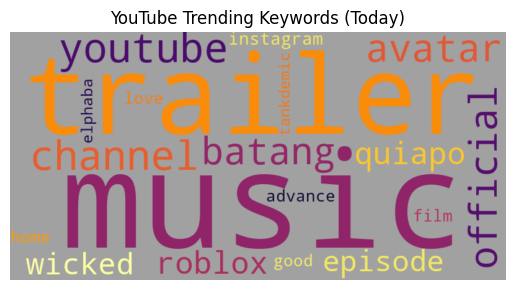

Top 20 Keywords:
music: 66
2025: 49
trailer: 43
youtube: 40
channel: 40
official: 36
avatar: 36
batang: 35
quiapo: 35
roblox: 35
wicked: 32
episode: 31
instagram: 31
love: 27
good: 26
home: 26
film: 26
advance: 25
elphaba: 24
tankdemic: 24


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="#a1a1a1", colormap="inferno",relative_scaling='auto',collocations=False).generate(" ".join(top_wckeywords))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("YouTube Trending Keywords (Today)")
plt.savefig("outputs/wordcloud.png")
plt.show()
print("Top 20 Keywords:")
for word,rank in top_keywords:
    print(f"{word}: {rank}")

In [22]:
yt_keywords = set([w for w in words if len(w) > 3 and w not in commonwords])
google_keywords = set(gt_df["query"].str.lower())

common = yt_keywords & google_keywords
alignment_score = len(common) / len(google_keywords) if google_keywords else 0
print("Alignment Score:", round(alignment_score*100, 2), "%")

Alignment Score: 0.0 %


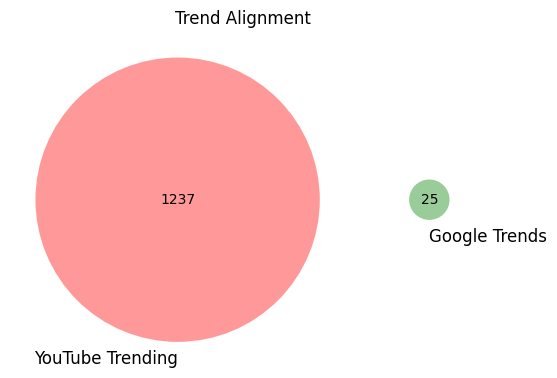

In [23]:
from matplotlib_venn import venn2

plt.figure(figsize=(6,6))
venn2([yt_keywords, google_keywords], set_labels=("YouTube Trending", "Google Trends"))
plt.title("Trend Alignment")
plt.savefig("outputs/trend_alignment.png")
plt.show()

In [24]:
query = text("""
    WITH cte AS (
        SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD'), view_count, like_count,  comment_count, title,  
        description, channel_id, published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id WHERE CAST(TO_CHAR(videos.recorded_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE
    )
    SELECT trends_queries.query,TO_CHAR(trends_queries.retrieved_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_retrieved_at,cte.title,cte.description,cte.video_id
    FROM trends_queries
    LEFT JOIN  cte
    ON lower(cte.title) LIKE '%' || lower(trends_queries.query) || '%'
       OR lower(cte.description) LIKE '%' || lower(trends_queries.query) || '%'
    WHERE cte.video_id IS NULL
    AND CAST(TO_CHAR(retrieved_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE
    LIMIT 10         
""")
queryprev=text("""
    WITH cte AS (
        SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD'), view_count, like_count,  comment_count, title,  
        description, channel_id, published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id WHERE CAST(TO_CHAR(videos.recorded_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '1 day'
    )
    SELECT trends_queries.query,TO_CHAR(trends_queries.retrieved_at, 'YYYY-MM-DD HH12:MI:SS AM') AS formatted_retrieved_at,cte.title,cte.description,cte.video_id
    FROM trends_queries
    LEFT JOIN  cte
    ON lower(cte.title) LIKE '%' || lower(trends_queries.query) || '%'
       OR lower(cte.description) LIKE '%' || lower(trends_queries.query) || '%'
    WHERE cte.video_id IS NULL
    AND CAST(TO_CHAR(retrieved_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '1 day'
    LIMIT 10         
""")

gap_df = pd.read_sql(query, engine)
if(gap_df.empty==True):
    gap_df = pd.read_sql(queryprev, engine)
print(gap_df.head(10))

                              query  formatted_retrieved_at title description  \
0          bon appetit your majesty  2025-09-29 07:26:14 AM  None        None   
1  grand lotto results september 27  2025-09-29 07:26:14 AM  None        None   
2                 accenture layoffs  2025-09-29 07:26:14 AM  None        None   
3            19th congress senators  2025-09-29 07:26:14 AM  None        None   
4  plants vs brainrots codes roblox  2025-09-29 07:26:14 AM  None        None   
5                      benny blanco  2025-09-29 07:26:14 AM  None        None   
6                     jeon yoo sung  2025-09-29 07:26:14 AM  None        None   
7                        al horford  2025-09-29 07:26:14 AM  None        None   
8                      lee chae-min  2025-09-29 07:26:14 AM  None        None   
9             idol kids philippines  2025-09-29 07:26:14 AM  None        None   

  video_id  
0     None  
1     None  
2     None  
3     None  
4     None  
5     None  
6     None  
7   

C:\Users\Ferde\AppData\Local\Temp\ipykernel_13276\3224010051.py:5: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="query",hue="query", x=gap_df.index+1, data=gap_df.head(11),palette=palette,legend=False)


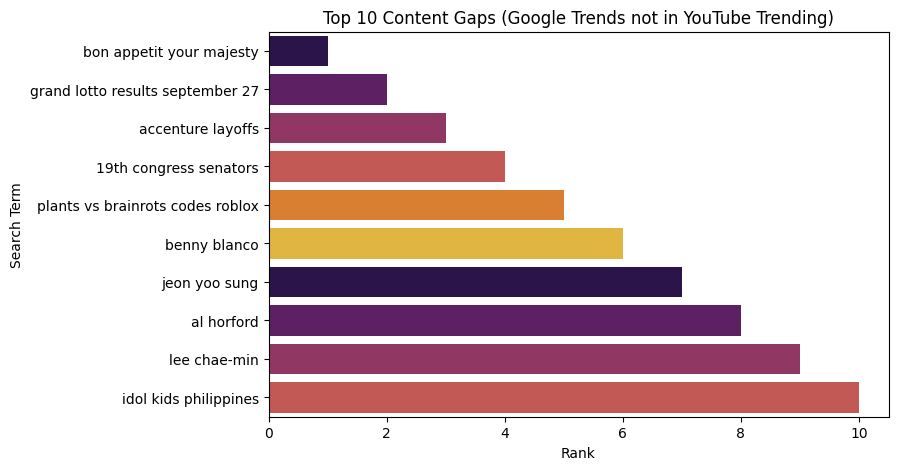

In [25]:
import seaborn as sns

plt.figure(figsize=(8,5))
palette = sns.color_palette("inferno")
sns.barplot(y="query",hue="query", x=gap_df.index+1, data=gap_df.head(11),palette=palette,legend=False)
plt.title("Top 10 Content Gaps (Google Trends not in YouTube Trending)")
plt.xlabel("Rank")
plt.ylabel("Search Term")
plt.savefig("outputs/contentgaps.png")
plt.show()

Alignment Score: 1.05 %


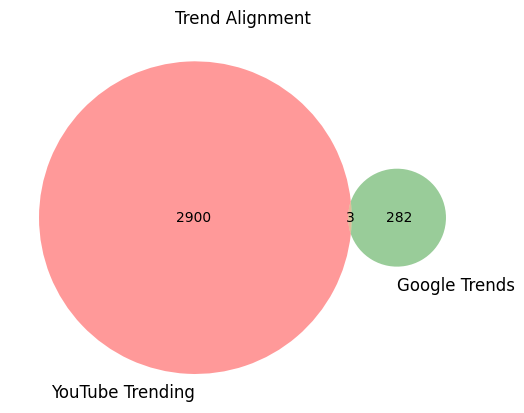

{'movies', 'trillion', 'riot'}


In [26]:
#CHECKING FOR ANY TRENDS THE MATCH ON YT AND GOOGLE SINCE THIS PROGRAM IS WORKING (SEPTEMBER 17, 2025)
# YouTube data
yt_df = pd.read_sql("SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD'), view_count, like_count,  comment_count, title,  description, channel_id, " \
"published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id", engine)
if(yt_df.empty==True):
    yt_df = pd.read_sql("SELECT videos.video_id, TO_CHAR(videos.recorded_at, 'YYYY-MM-DD'), view_count, like_count,  comment_count, title,  description, channel_id, " \
    "published_at FROM video_stats JOIN videos ON video_stats.video_id = videos.video_id WHERE CAST(TO_CHAR(videos.recorded_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '1 day'", engine)

# Google Trends data
gt_df = pd.read_sql("SELECT query FROM trends_queries", engine)
if(gt_df.empty==True):
    gt_df = pd.read_sql("SELECT * FROM trends_queries WHERE CAST(TO_CHAR(retrieved_at, 'YYYY-MM-DD') AS DATE) = CURRENT_DATE - INTERVAL '3 day'", engine)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.split()

words = []
for t in yt_df["title"].fillna("").tolist() + yt_df["description"].fillna("").tolist():
    words.extend(w for w in clean_text(t) if w not in commonwords and len(w)>3)

yt_keywords = set(words)
google_keywords = set(gt_df["query"].str.lower())

common = yt_keywords & google_keywords
alignment_score = len(common) / len(google_keywords) if google_keywords else 0
print("Alignment Score:", round(alignment_score*100, 2), "%")

from matplotlib_venn import venn2

plt.figure(figsize=(6,6))
venn2([yt_keywords, google_keywords], set_labels=("YouTube Trending", "Google Trends"))
plt.title("Trend Alignment")
plt.savefig("outputs/trend_alignment.png")
plt.show()
print(common)